Imports and Data Loading

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore



In [42]:
# Loading dataset

data_set=pd.read_excel("Healthcare_dataset.xlsx")

In [43]:
#check for missing values

missing_values=data_set.isnull().sum()

missing_columns=missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


From the result, it's clear that there is no missing values in the given dataset

In [44]:
# Findling and handling outliers

# calculating Z-score for the numerical columns

data_set['Dexa_Freq_During_Rx_Z_Score']=zscore(data_set['Dexa_Freq_During_Rx'])
data_set['Count_Of_Risks_Z_Score']=zscore(data_set['Count_Of_Risks'])

# Setting threshold for finding outliers

threshold=3

# Filtering the outliers
data_cleaned=data_set[(abs(data_set['Dexa_Freq_During_Rx_Z_Score'])<threshold)&(abs(data_set['Count_Of_Risks_Z_Score'])<threshold)]


# dropping the Z-score column
data_cleaned=data_cleaned.drop(['Dexa_Freq_During_Rx_Z_Score','Count_Of_Risks_Z_Score'],axis=1)


# checking the shape of the cleaned dataset
data_cleaned.shape

(3344, 69)

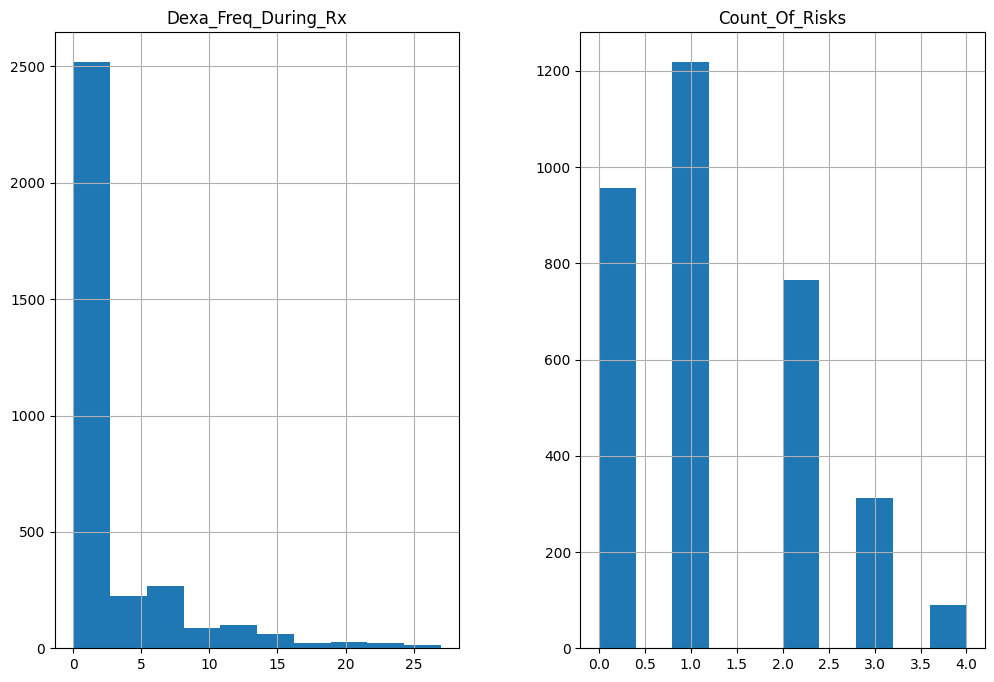

In [45]:
#Plot histograms to check the distribution of numerical features

data_set.hist(figsize=(12,8),bins=20)
plt.show()

The above distributions suggest that most patients have a low frequency of Dexa during Rx and tend to have 0-2 risks, with fewer patients having higher frequencies or more risks.

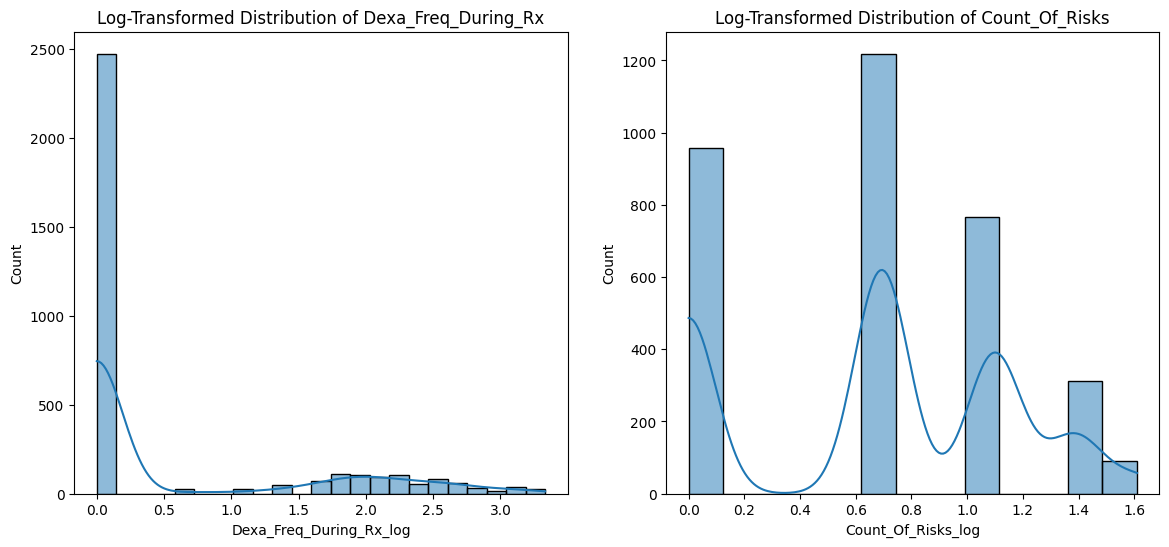

In [46]:
# Transforming skewed data

# From the above graph, it is clearly shows that Dexa_ is heavily right skewed
# and although Count_of_Risks is distributed evenly, it is lightly skewed.

# Applying log transformation to the numerical columns

data_cleaned['Dexa_Freq_During_Rx_log']=np.log1p(data_cleaned['Dexa_Freq_During_Rx'])
data_cleaned['Count_Of_Risks_log']=np.log1p(data_cleaned['Count_Of_Risks'])

# plotting the transformed data in histogram

plt.figure(figsize=(14,6))

# Histogram for Dexa_Freq_During_Rx_log
plt.subplot(1,2,1)
sns.histplot(data_cleaned['Dexa_Freq_During_Rx_log'],kde=True)
plt.title('Log-Transformed Distribution of Dexa_Freq_During_Rx')

# Histogram for COunt of Risks_log

plt.subplot(1,2,2)
sns.histplot(data_cleaned['Count_Of_Risks_log'],kde=True)
plt.title('Log-Transformed Distribution of Count_Of_Risks')

plt.show()

In [47]:
# COnverting datatype of categorical columns to category datatype

categorical_columns=data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns]=data_cleaned[categorical_columns].astype('category')

# verifying the datatype
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3344 entries, 0 to 3423
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Ptid                                                                3344 non-null   category
 1   Persistency_Flag                                                    3344 non-null   category
 2   Gender                                                              3344 non-null   category
 3   Race                                                                3344 non-null   category
 4   Ethnicity                                                           3344 non-null   category
 5   Region                                                              3344 non-null   category
 6   Age_Bucket                                                          3344 non-null   category
 7   Ntm_Special

In [51]:
# applying one hot encoding to categorical variables

#data_encoded=pd.get_dummies(data_cleaned,drop_first=True)

#data_encoded.shape  # displaying the shape of the encoded data

def encoding(df):
  encoder=OneHotEncoder(sparse_output=False)
  data_encoded=encoder.fit_transform(df)
  return data_encoded

data_encoded=encoding(data_cleaned)

In [52]:
data_encoded.shape

(3344, 3591)